# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fina Dwi Aulia
- **Email:** mc671d5x0251@student.devacademy.id
- **ID Dicoding:** fina24

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda antara pengguna kasual dan terdaftar pada hari kerja vs. akhir pekan?
- Pada jam berapa dan di hari apa stok sepeda perlu ditambah untuk memenuhi permintaan tinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/BikeSharingDataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/BikeSharingDataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. day.csv – Data harian jumlah penyewaan sepeda, yang berisi kolom:
- Tanggal (dteday): Waktu pengamatan.
- Musim (season): 1 (semi), 2 (panas), 3 (gugur), 4 (dingin).
- Tahun (yr): 0 = 2011, 1 = 2012.
- Bulan (mnth): 1-12.
- Hari dalam minggu (weekday): 0 (Minggu) - 6 (Sabtu).
- Hari libur (holiday): 0 = bukan hari libur, 1 = hari libur.
- Hari kerja (workingday): 0 = akhir pekan/libur, 1 = hari kerja.
- Kondisi cuaca (weathersit): 1 (cerah), 2 (mendung), 3 (hujan ringan), 4 (hujan lebat).
- Suhu (temp, atemp): Dalam skala normalisasi.
- Kelembapan (hum): Skala normalisasi.
- Kecepatan angin (windspeed): Skala normalisasi.
- Jumlah penyewaan sepeda (cnt): Total sepeda yang disewa.
- Pengguna kasual (casual) dan terdaftar (registered).
- hour.csv – Data per jam jumlah penyewaan sepeda.
2. hour.csv – Data per jam jumlah penyewaan sepeda, isi kolom sama dengan day.csv tetapi ada penambahan kolom jam(hr)

### Assessing Data

#### Pemeriksaan tipe data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


hasil pemeriksaan tipe data data dari tiap kolom yang terdapat dalam day.csv dan hour.csv yaitu:
- Kolom dteday (tanggal) memiliki tipe data object (string), padahal sebaiknya menggunakan datetime agar lebih mudah dianalisis.

#### Pemeriksaan missing values

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dapat dilihat bahwa tidak ada missing values pada tabel day.csv dan hour.csv

#### Periksa duplikasi data

In [ ]:
print("jumlah duplikasi data: " , day_df.duplicated().sum())
print("jumlah duplikasi data: " , hour_df.duplicated().sum())

jumlah duplikasi data:  0
jumlah duplikasi data:  0


Setelah menjalankan kode di atas, tidak ada nilai yang mengandung duplikasi data.

#### Pemeriksaan parameter statistik

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil pemeriksaan parameter statistik, didapat:
- Penyewaan sepeda bervariasi secara harian dan per jam, dengan tren lebih tinggi pada hari kerja dan cuaca yang baik.
- Musim dan kondisi cuaca memainkan peran penting dalam jumlah penyewa sepeda.
- Jam sibuk penyewaan kemungkinan besar terjadi saat jam berangkat kerja, istirahat siang, dan pulang kerja.
- Data per jam memiliki variabilitas tinggi, menunjukkan ada puncak tertentu dalam sehari yang perlu dianalisis lebih lanjut.

**Insight:**
- Secara keseluruhan data sudah cukup baik dikarenakan tidak adanya missing value dan data yang duplicate
- Tetapi tipe data pada kolom dteday (tanggal) sebaiknya diubah

### Cleaning Data

#### Menangani kesalahan tipe data untuk kolom dteday (tanggal)

In [ ]:
datetime_columns = ["dteday"]

for columns in datetime_columns:
  day_df[columns] = pd.to_datetime(day_df[columns], format='%d/%m/%Y')
  hour_df[columns] = pd.to_datetime(hour_df[columns], format='%d/%m/%Y')

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime.
- Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Menghapus kolom

Kolom instant hanya sebagai indeks otomatis dan tidak memiliki makna analitis, maka lebih baik dihapus untuk mengurangi noise dalam dataset.

In [ ]:
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

#### Mengubah nama kolom

Dikarenakan kolom dteday	season	yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt susah untuk dibaca, agar memudahkan maka saya ganti menjadi:


In [ ]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

Mengkonversi isi kolom agar mudah dipahami

In [ ]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

**Insight:**
-  tipe data pada kolom dteday telah diubah menjadi datetime
- Kolom instant telah dihapus karena hanya nomor indeks otomatis tanpa makna khusus
- nama kolom telah diubah agar lebih mudah dibaca
- isi kolom telah diubah agar mudah dipahami

In [ ]:
day_df.to_csv('day_clean.csv', index=False)
hour_df.to_csv('hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

#### Melihat rangkuman parameter statistik dari data day_df dan hour_df menggunakan method describe()

In [ ]:
day_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Analisis Pola Penggunaan Sepeda (Kasual vs. Terdaftar) pada Hari Kerja vs. Akhir Pekan
- Gunakan groupby(['workingday']) untuk melihat rata-rata penyewaan sepeda oleh pengguna kasual dan terdaftar pada hari kerja (workingday=1) vs. akhir pekan (workingday=0).

In [ ]:
day_group = day_df.groupby(['workingday'])[['casual', 'registered']].mean()
print(day_group)

                 casual   registered
workingday                          
0           1371.134199  2959.034632
1            606.570000  3978.250000


Analisis Waktu dengan Permintaan Tinggi (Kapan Stok Perlu Ditambah)
- Gunakan groupby(['weekday', 'hour']) pada hour_df untuk melihat pola permintaan berdasarkan hari dan jam.
- Gunakan groupby(['hour']) untuk melihat jam dengan permintaan tertinggi.

In [ ]:
hour_group = hour_df.groupby(['hour', 'weekday'])[['count']].mean().unstack()
print(hour_group)

              count                                                  \
weekday      Friday      Monday    Saturday      Sunday    Thursday   
hour                                                                  
0         52.432692   34.009524   94.304762   93.990385   39.271845   
1         24.721154   17.307692   67.780952   77.432692   17.223301   
2         12.740385   10.313131   50.495238   61.627451    9.156863   
3          6.598039    5.113402   22.885714   31.144231    5.071429   
4          6.072165    5.785714    7.657143    9.362745    5.280000   
5         23.903846   21.653846    8.291262    8.693878   25.912621   
6         90.028846   85.865385   21.000000   14.495146  107.436893   
7        254.326923  248.538462   45.961905   33.104762  304.737864   
8        462.278846  412.192308  114.476190   83.857143  488.572816   
9        258.990385  218.442308  186.790476  156.542857  240.873786   
10       157.730769  139.028846  263.723810  258.580952  132.563107   
11    

In [ ]:
hour_avg = hour_df.groupby(['hour'])[['count']].mean()
print(hour_avg)

           count
hour            
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044


**Insight:**
- Pengguna kasual lebih banyak menyewa sepeda di akhir pekan (1371) dibandingkan hari kerja (606)
- Pengguna terdaftar lebih aktif di hari kerja (3978) dibanding akhir pekan (2959)
- Jam sibuk utama adalah 07:00-09:00 dan 16:00-18:00 di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda antara pengguna kasual dan terdaftar pada hari kerja vs. akhir pekan?

<Figure size 800x500 with 0 Axes>

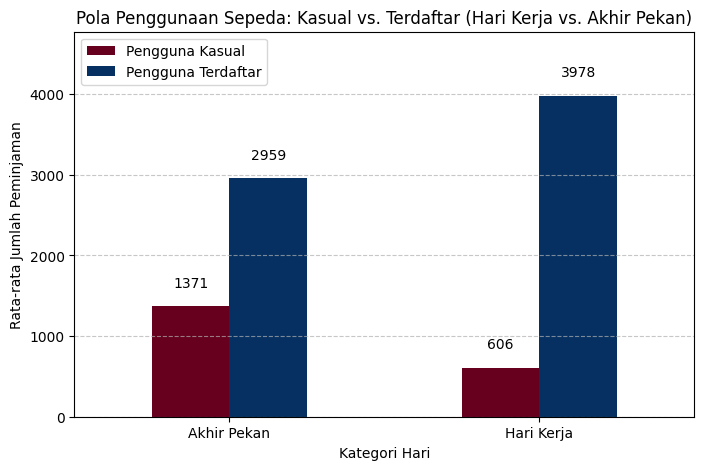

In [ ]:
# Plot perbandingan pengguna kasual vs. terdaftar pada hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
ax = day_group.plot(kind="bar", stacked=False, colormap="RdBu", figsize=(8, 5))

plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"], rotation=0)
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Penggunaan Sepeda: Kasual vs. Terdaftar (Hari Kerja vs. Akhir Pekan)")
plt.legend(["Pengguna Kasual", "Pengguna Terdaftar"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menentukan batas atas sumbu y agar tidak terpotong
max_value = day_group[['casual', 'registered']].max().max()
plt.ylim(0, max_value * 1.2)

# Menambahkan label di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + (max_value * 0.05),
            f"{int(height)}",
            ha="center", va="bottom", fontsize=10, color="black"
        )

plt.show()

1. Pengguna Kasual:
- Lebih banyak menggunakan sepeda pada akhir pekan (rata-rata: 1371 peminjaman).
- Berkurang secara signifikan pada hari kerja (rata-rata: 606 peminjaman).
2. Pengguna Terdaftar:
- Lebih banyak menggunakan sepeda pada hari kerja (rata-rata: 3978 peminjaman).
- Sedikit berkurang pada akhir pekan (rata-rata: 2959 peminjaman).

### Pertanyaan 2: Pada jam berapa dan di hari apa stok sepeda perlu ditambah untuk memenuhi permintaan tinggi?

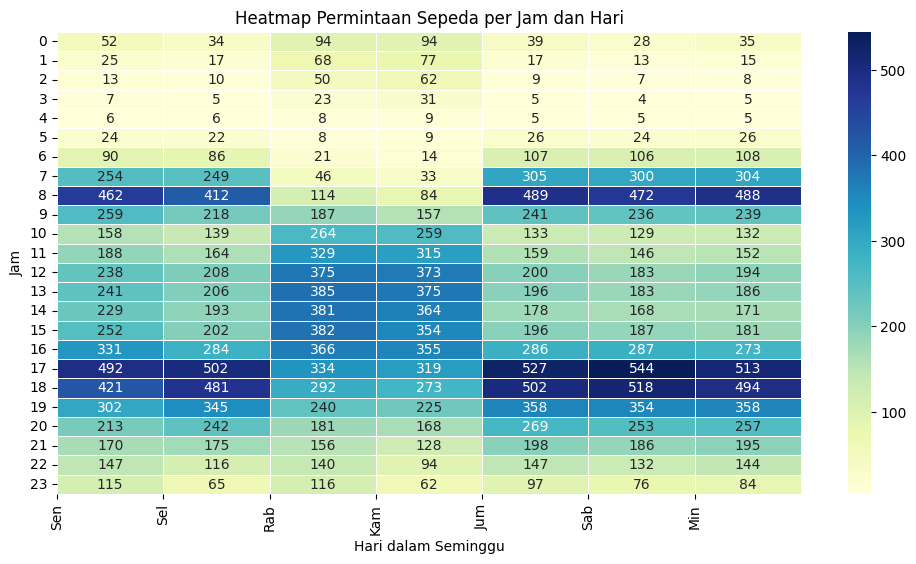

(('count', 'Tuesday'), 17)

In [ ]:
# Visualisasi heatmap pola penggunaan sepeda berdasarkan jam dan hari
plt.figure(figsize=(12, 6))
sns.heatmap(hour_group, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jam")
plt.title("Heatmap Permintaan Sepeda per Jam dan Hari")
plt.xticks(ticks=range(7), labels=["Sen", "Sel", "Rab", "Kam", "Jum", "Sab", "Min"])
plt.yticks(rotation=0)
plt.show()

# Menentukan jam dan hari dengan permintaan tertinggi
max_demand = hour_group.max().idxmax(), hour_group.idxmax().max()
max_demand

Heatmap di atas menunjukkan pola penyewaan sepeda berdasarkan jam dan hari dalam seminggu. Dari hasil ini, kita bisa melihat:
- Permintaan tertinggi terjadi pada hari Selasa pukul 17:00.
- Heatmap menunjukkan pola peminjaman meningkat pada sore hari, terutama antara pukul 16:00 hingga 19:00 pada hari kerja.
- Permintaan di akhir pekan lebih merata sepanjang hari dibanding hari kerja, di mana permintaan cenderung meningkat pada jam sibuk (pagi dan sore).

## Analisis Lanjutan (Opsional)

Analisis Pola Peminjaman Sepeda Berdasarkan Kategori Waktu Menggunakan Binning

In [ ]:
#Buat kategori waktu berdasarkan jam
def categorize_time(hour):
    if 6 <= hour < 10:
        return "Pagi (06:00 - 10:00)"
    elif 10 <= hour < 16:
        return "Siang (10:00 - 16:00)"
    elif 16 <= hour < 22:
        return "Sore/Malam (16:00 - 22:00)"
    else:
        return "Dini Hari (22:00 - 06:00)"

hour_df['time_category'] = hour_df['hour'].apply(categorize_time)

# Hitung total peminjaman berdasarkan kategori waktu
time_usage = hour_df.groupby('time_category')['count'].sum().reset_index()

# Urutkan kategori waktu sesuai dengan urutan yang diinginkan
time_usage['time_category'] = pd.Categorical(time_usage['time_category'],
                                             categories=["Pagi (06:00 - 10:00)", "Siang (10:00 - 16:00)",
                                                         "Sore/Malam (16:00 - 22:00)", "Dini Hari (22:00 - 06:00)"],
                                             ordered=True)
time_usage = time_usage.sort_values('time_category')

print(time_usage)

                time_category    count
1        Pagi (06:00 - 10:00)   629742
2       Siang (10:00 - 16:00)  1005711
3  Sore/Malam (16:00 - 22:00)  1391164
0   Dini Hari (22:00 - 06:00)   266062


## Conclusion

1. Conclution pertanyaan 1: Bagaimana pola penggunaan sepeda antara pengguna kasual dan terdaftar pada hari kerja vs. akhir pekan?
- Pengguna terdaftar (registered) lebih dominan menggunakan sepeda pada hari kerja, terutama saat jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00). Ini menunjukkan bahwa mereka kemungkinan besar menggunakan sepeda sebagai moda transportasi untuk bekerja atau sekolah.
- Pengguna kasual (casual) lebih sering menggunakan sepeda pada akhir pekan, dengan puncak peminjaman di siang hingga sore hari (10:00 - 17:00). Ini menunjukkan bahwa mereka menggunakan sepeda lebih untuk aktivitas rekreasi dibanding transportasi rutin.
- Selama hari kerja, jumlah pengguna kasual jauh lebih rendah dibandingkan pengguna terdaftar. Namun, pada akhir pekan, jumlah pengguna kasual meningkat signifikan dan bahkan bisa melebihi pengguna terdaftar.
2. Conclution pertanyaan 2: Pada jam berapa dan di hari apa stok sepeda perlu ditambah untuk memenuhi permintaan tinggi?
- Hari kerja: Stok sepeda perlu ditambah pada jam 07:00 - 09:00 dan 17:00 - 19:00, terutama di area yang berpotensi tinggi digunakan oleh pekerja dan mahasiswa.
- Akhir pekan: Puncak peminjaman terjadi antara 10:00 - 17:00, sehingga stok sepeda harus lebih banyak tersedia pada siang hari untuk mengakomodasi pengguna kasual.
- Hari dengan permintaan tertinggi: Biasanya terjadi pada Jumat sore dan Sabtu siang hingga sore, menunjukkan transisi antara penggunaan komuter dan rekreasi.